In [148]:
from selenium import webdriver
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException

driver = webdriver.Chrome()
driver.get('https://play.google.com/store/apps/details?id=com.mrt.ducati')
time.sleep(1)

driver.execute_script("window.scrollTo(0, 1000)")
review_button = '#yDmH0d > c-wiz > div > div > div > div > div > div > div > c-wiz > section > header > div > div > button > i'
button = driver.find_element(By.CSS_SELECTOR, review_button)
button.click()
time.sleep(10)
                      
title = driver.find_elements(By.CSS_SELECTOR, '#yDmH0d > div.VfPpkd-Sx9Kwc.cC1eCc.UDxLd.PzCPDd.HQdjr.VfPpkd-Sx9Kwc-OWXEXe-FNFY6c > div.VfPpkd-wzTsW > div > div > div > div > div.fysCi > div > div > div > div.h3YV2d')

titletext = []
for i in title:
    titletext.append(i.text)
    
alltitle = "\n".join(titletext)
f = open("마이리얼트립.txt", 'w')
f.write(alltitle)
f.close()

driver.quit()

In [150]:
from kiwipiepy import Kiwi
import pandas as pd
import re

kiwi = Kiwi()
kiwi.load_user_dictionary('user_dictionary.txt')
kiwi.prepare()
def extract_noun(text):
    result = kiwi.tokenize(text)
    for token in result:
        if token.tag in ['VV', 'VA', 'NNG', 'NNP']:
            yield token.form
title = open('마이리얼트립_12.txt', encoding = 'UTF-8').read()
title = re.sub('[^가-힣]', '', title)
titlelist = list(extract_noun(title))
topwords = pd.Series(titlelist).value_counts().head(100)
topwords.to_csv("마이리얼트립_12.csv")

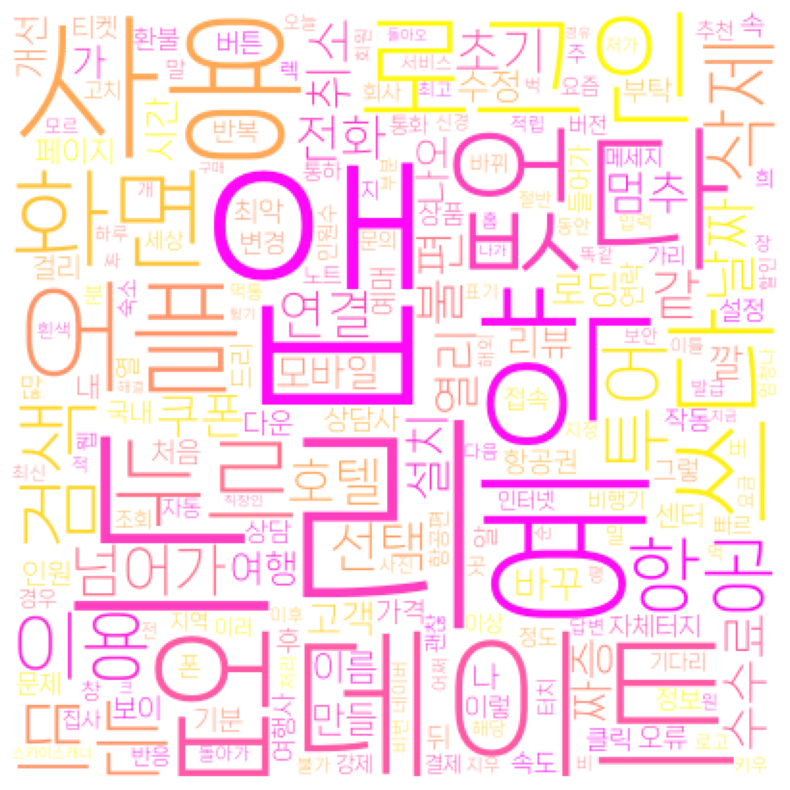

In [5]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df = pd.read_csv("./인터파크투어/인터파크투어_12-수정.csv")
cloudword = df.set_index('word').to_dict()['count']

font = '나눔스퀘어_네오.otf'
palettes = ['spring', 'summer']

wc = WordCloud(random_state = 10, 
               font_path = font, 
               width = 400,
               height = 400, 
               colormap = palettes[0],
               background_color = 'white')
img_wordcloud = wc.generate_from_frequencies(cloudword)

plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(img_wordcloud)
plt.savefig('인터파크_12')